# Aashish Pandey, Umesh Jaiswal
## Deep Learning - CSCE 5218 (Spring 2021)
## Traffic Sign Recognition


In [90]:
!pip install visualkeras

You should consider upgrading via the '/Users/aashish/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


### Creating dataframe to include path and label of train and test dataset

In [150]:
import visualkeras
import pandas as pd
df=pd.read_csv('Train.csv',
               usecols=['ClassId','Path','Width','Height']).rename(columns={"ClassId": "label",
                                                                            "Path": "path"})

test=pd.read_csv('Test.csv',usecols=['ClassId','Path']).rename(columns={"ClassId": "label"})


print(df.head())

   Width  Height  label                            path
0     27      26     20  Train/20/00020_00000_00000.png
1     28      27     20  Train/20/00020_00000_00001.png
2     29      26     20  Train/20/00020_00000_00002.png
3     28      27     20  Train/20/00020_00000_00003.png
4     28      26     20  Train/20/00020_00000_00004.png


## Number of Classes

In [151]:
print('\n-----------No. of Classes-----------')
print(df.label.nunique())


-----------No. of Classes-----------
43


In [3]:
pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in /Users/aashish/opt/anaconda3/lib/python3.7/site-packages (2.4.1)
You should consider upgrading via the '/Users/aashish/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [92]:

pip install tf-nightly

ERROR: Could not find a version that satisfies the requirement tf-nightly (from versions: none)
ERROR: No matching distribution found for tf-nightly
You should consider upgrading via the '/Users/aashish/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


### Train dataset is splitted into 80% for training and 20% for validation 

In [93]:
import tensorflow as tf
# Training path for images to grab
train_img_path='Train'
# Define Std batch size of 32
batch_size = 32

# As images size vary from 26 X 26 to 173 X 173, use std img size
img_height = 26
img_width = 26

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_img_path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_img_path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 39209 files belonging to 43 classes.
Using 31368 files for training.
Found 39209 files belonging to 43 classes.
Using 7841 files for validation.


# Dataset
### The dataset that we worked on is the GTSRB dataset from kaggle. It is a publicly available multiclass classification dataset. The dataset contains 39209 data belonging to 43 different classes. Out of 39209 data, 31368 are used for training and 7841 are used for testing. The class labels for prediction include the label of different traffic signs like “Speed limit 20 km/h”, “No Passing”, “Stop”, “Yield” etc. Data is readily available and already downloaded in the local machine and already partitioned  into training/testing by kaggle.

### The link for data source is:
https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

### Manually Setting the numbered labels into Written Lables

In [94]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }


### The Class distribution in training dataset is shown in chart below 

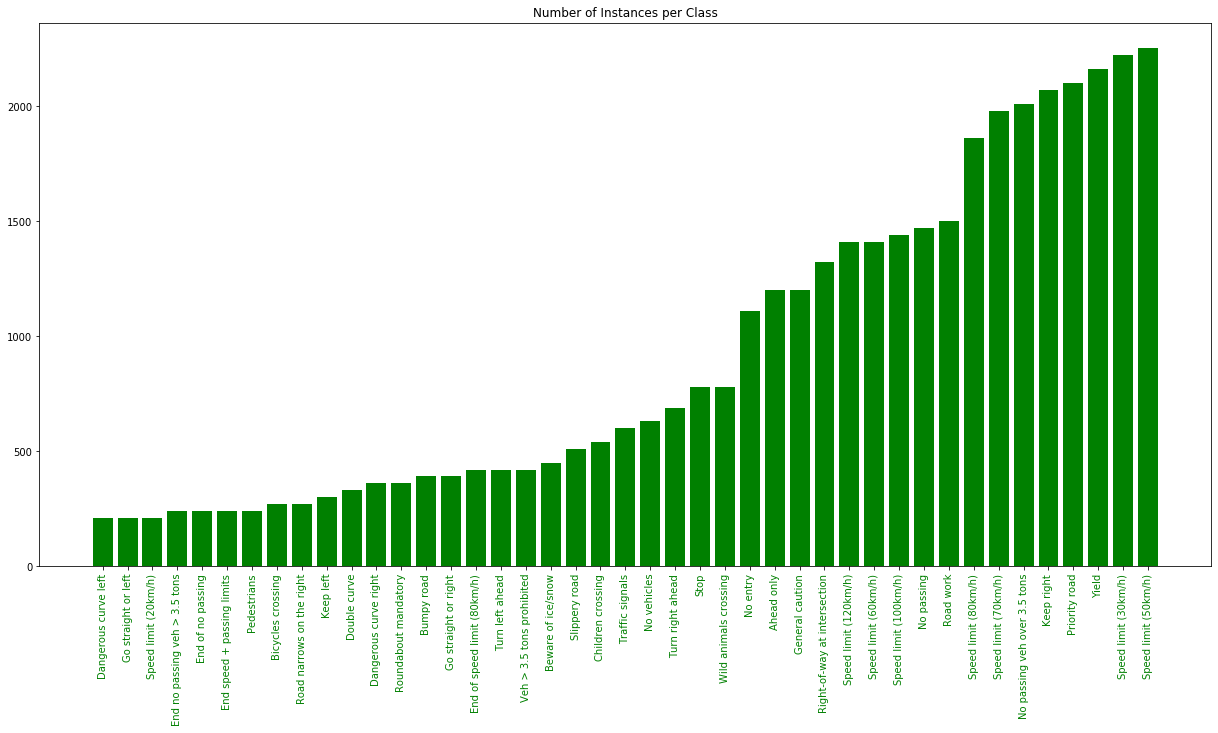

In [137]:
import os
import matplotlib.pyplot as plt
folders = os.listdir(train_img_path)

train_number = []
class_num = []

for folder in range(43):
    train_files = os.listdir(train_img_path + '/' + str(folder))
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.title("Number of Instances per Class")
plt.bar(class_num, train_number, color ='green')
plt.xticks(class_num, rotation='vertical', color = 'green')
plt.show()


### Test DataFrame consisting of the Path to the test image and label associated with it.

In [96]:
test

,label,Path
0,16,Test/00000.png
1,1,Test/00001.png
2,38,Test/00002.png
3,33,Test/00003.png
4,11,Test/00004.png
...,...,...
12625,12,Test/12625.png
12626,33,Test/12626.png
12627,6,Test/12627.png
12628,7,Test/12628.png


# Visualizing 15 random images from test data

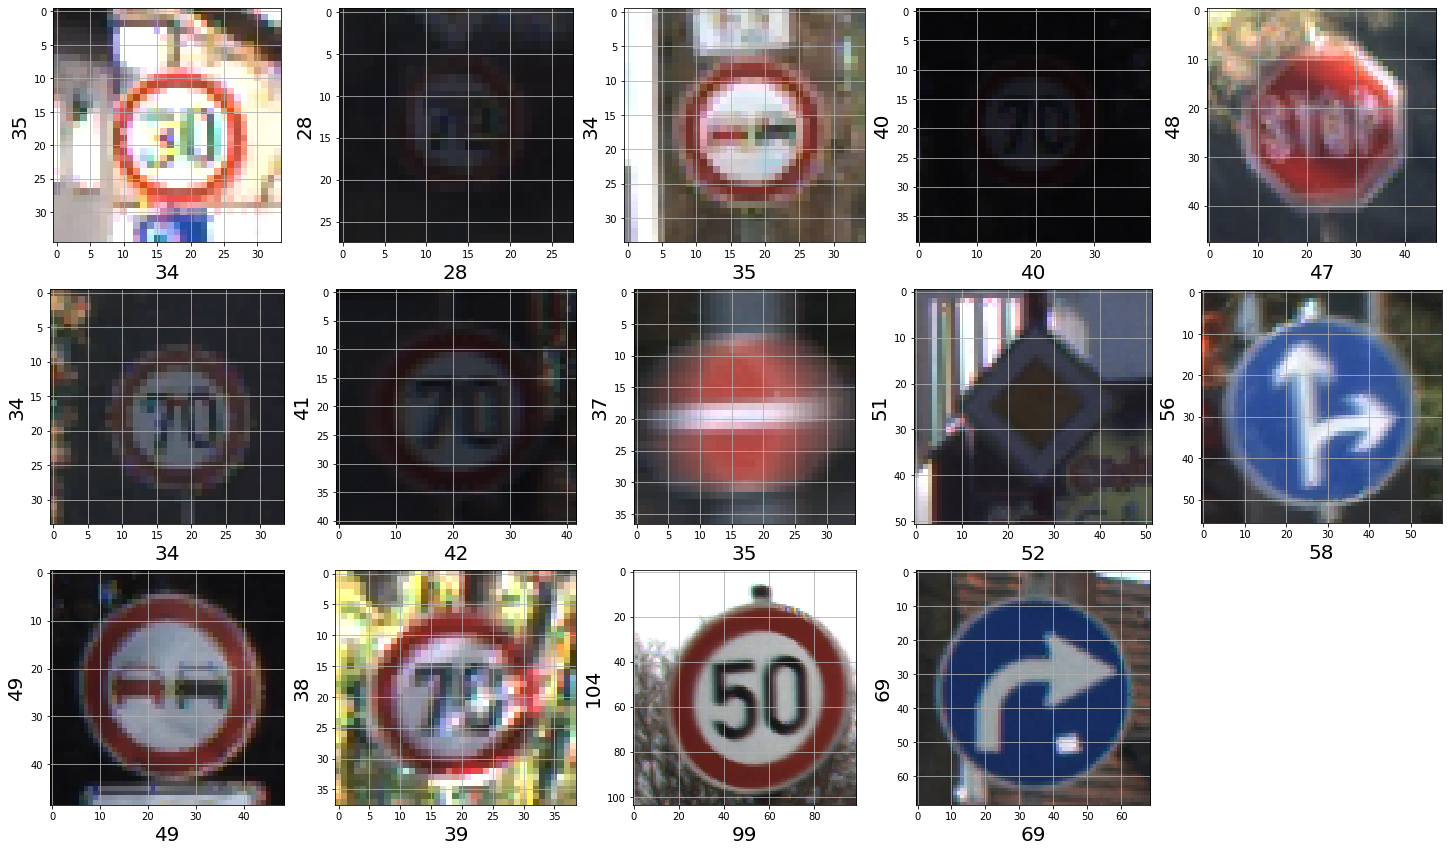

In [138]:

input_path = ""
data_dir = input_path
import random
from matplotlib.image import imread

# test = pd.read_csv(data_dir + '/Test.csv')
imgs = test["Path"].values #test folder path

plt.figure(figsize=(25,25))

for i in range(1,16):
    plt.subplot(5,5,i)
    random_img_path = random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

# Model 1
### We have replicated the architecture/implementation form original work in kaggle and named it as Model 1. Model 1 consists of 3 Convolutional layers and 3 Max pooling layers. The output of those layers is flattened and then passed to dense layer of 128 units and 43 units for the final classification output.

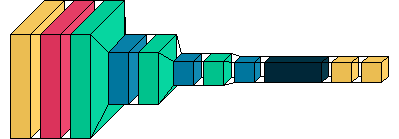

In [140]:

import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
import tensorflow.keras.layers as layers
import tensorflow.keras.layers.experimental.preprocessing as preprocessing

num_classes=43

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.experimental.preprocessing.RandomContrast(0.6),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
 
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


visualkeras.layered_view(model)

# Model 2
## We have updated the architecture and made slight change to generate similar architecture called model 2. Model 2 has fewer number of convolutional layers and Maxpooling layer as compared to Model 1. This change in architecture has brought the number of learanable parameters down to 81,675 (previously in Model 1 the number of learnable parameters was 102,987.)


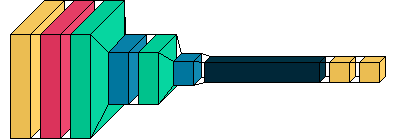

In [142]:
num_classes=43

model2 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.experimental.preprocessing.RandomContrast(0.6),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes)
])

model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


visualkeras.layered_view(model2)

In [143]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_5 (Rescaling)      (None, 26, 26, 3)         0         
_________________________________________________________________
random_contrast_5 (RandomCon (None, 26, 26, 3)         0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 6, 6, 64)        

In [144]:
model2.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_7 (Rescaling)      (None, 26, 26, 3)         0         
_________________________________________________________________
random_contrast_7 (RandomCon (None, 26, 26, 3)         0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_30 (Flatten)         (None, 1152)            

### After both of the models are created and compiled with same optimizer and same loss function. Now we have trained both models for 5 epoches and compare the performance on same training and validation datasets

In [145]:
epochs=5
history = model.fit(train_ds,validation_data=val_ds,epochs=epochs,batch_size=32)


Epoch 1/5
981/981 [==============================] - 65s 66ms/step - loss: 2.5342 - accuracy: 0.3045 - val_loss: 0.5790 - val_accuracy: 0.8250
Epoch 2/5
981/981 [==============================] - 77s 78ms/step - loss: 0.4956 - accuracy: 0.8521 - val_loss: 0.2121 - val_accuracy: 0.9432
Epoch 3/5
981/981 [==============================] - 86s 88ms/step - loss: 0.2254 - accuracy: 0.9351 - val_loss: 0.1365 - val_accuracy: 0.9633
Epoch 4/5
981/981 [==============================] - 80s 81ms/step - loss: 0.1268 - accuracy: 0.9642 - val_loss: 0.0980 - val_accuracy: 0.9759
Epoch 5/5
981/981 [==============================] - 79s 80ms/step - loss: 0.0920 - accuracy: 0.9748 - val_loss: 0.0889 - val_accuracy: 0.9802


In [146]:

epochs=5
history2 = model2.fit(train_ds,validation_data=val_ds,epochs=epochs,batch_size=32)


Epoch 1/5
981/981 [==============================] - 69s 69ms/step - loss: 2.5824 - accuracy: 0.3172 - val_loss: 0.7086 - val_accuracy: 0.7883
Epoch 2/5
981/981 [==============================] - 78s 79ms/step - loss: 0.5998 - accuracy: 0.8311 - val_loss: 0.2943 - val_accuracy: 0.9205
Epoch 3/5
981/981 [==============================] - 70s 71ms/step - loss: 0.3220 - accuracy: 0.9124 - val_loss: 0.2291 - val_accuracy: 0.9426
Epoch 4/5
981/981 [==============================] - 71s 72ms/step - loss: 0.2156 - accuracy: 0.9447 - val_loss: 0.1974 - val_accuracy: 0.9527
Epoch 5/5
981/981 [==============================] - 74s 75ms/step - loss: 0.1614 - accuracy: 0.9565 - val_loss: 0.1382 - val_accuracy: 0.9716


### From the results above both of the models have significantly high accuracy. While the Model 1 slightly outperforms Model 2 by 1% accuracy. The time taken by Model 2 is lower than that of Model 1. This is because the number of Learnable parameter in Model 2 is less than that of Model 1.

### The charts below demonstrate the Training loss vs validation loss and Training accuracy vs Validation accuracy of both the models, we can see that both the models behaves pretty similiarly in this case.

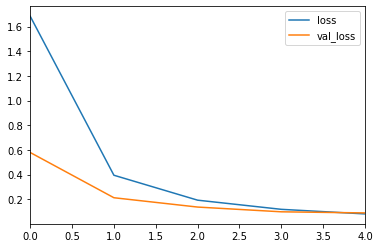

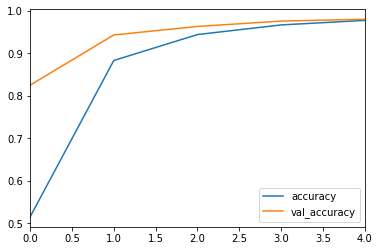

In [148]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

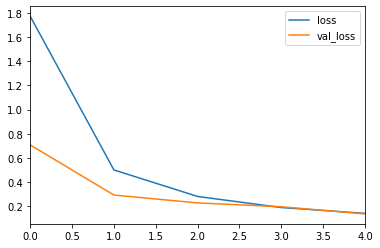

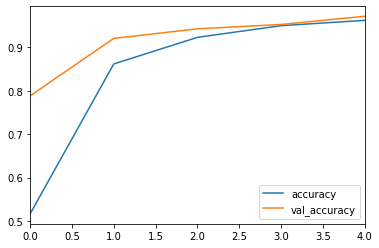

In [147]:
history_frame = pd.DataFrame(history2.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

In [ ]:
## 